In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
%matplotlib inline

'cat'

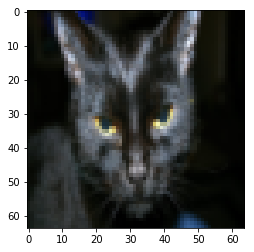

In [3]:
index = 25
plt.imshow(train_set_x_orig[index])
classes[np.squeeze(train_set_y[:,index])].decode("utf-8")

In [4]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],( -1))
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],( -1))

In [5]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

# Use Neural Network (MLP)

In [17]:
"""
You need to play around with the following three items
to make sure the error is acceptable on the training and
test sets:
    1- Regularization Factor
    2- Number of Hidden Layers 
    3 - umber of neurons in the hidden layers 
    (note that number of neurons in the hidden layers should be equal, e.g. hidden_layer_sizes=(14000,14000))
    4 - solver
number of neurons in the hidden layer, higher is better 
number of hidden layers, it is very common to use only one hidden layers
"""

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

regilarization_factor = 0.05
clf = MLPClassifier(hidden_layer_sizes=(10000,10000), max_iter=500, alpha=regilarization_factor,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
start = timeit.default_timer()
clf.fit(train_set_x, train_set_y.T)
start = timeit.default_timer()


y_pred_test_nn = clf.predict(test_set_x)
y_pred_train_nn = clf.predict(train_set_x)
acc_test_nn = accuracy_score(test_set_y.T, y_pred_test_nn)
acc_train_nn = accuracy_score(train_set_y.T, y_pred_train_nn)
print("train accuracy: {:0.2f} %".format(acc_train_nn*100))
print("test accuracy: {:0.2f} %".format(acc_test_nn*100))
print('neural network training time: {:0.2f} seconds'.format(stop - start))  



/Users/benyaminmoradzadeh/anaconda3/envs/python_venv_36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5.71551472
Iteration 2, loss = 5.83902222
Iteration 3, loss = 5.68409538
Iteration 4, loss = 5.68690579
Iteration 5, loss = 5.63549616
Iteration 6, loss = 5.62265840
Iteration 7, loss = 5.61484402
Iteration 8, loss = 5.60513474
Iteration 9, loss = 5.58650614
Iteration 10, loss = 5.56954383
Iteration 11, loss = 5.58517655
Iteration 12, loss = 5.56645275
Iteration 13, loss = 5.54825275
Iteration 14, loss = 5.57127654
Iteration 15, loss = 5.55497162
Iteration 16, loss = 5.51877551
Iteration 17, loss = 5.50816308
Iteration 18, loss = 5.50801930
Iteration 19, loss = 5.49630764
Iteration 20, loss = 5.52904209
Iteration 21, loss = 5.59479010
Iteration 22, loss = 5.54055922
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
train accuracy: 84.21 %
test accuracy: 70.00 %


# Use SVM

In [36]:
"""
You need to play around with the following two items
to make sure the error is acceptable on the training and
test sets:
    1- Regularization Factor
    2- Kernel (rbf aka guassian is the most popular but sometimes linear perform well too (linear is faster))
    
    
"""

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import timeit

regilarization_factor = 0.00001
svm_sol = SVC(C=float(1/regilarization_factor), kernel='rbf',max_iter=500,random_state=21)

start = timeit.default_timer()
svm_sol.fit(train_set_x, train_set_y.T)
stop = timeit.default_timer()

y_pred_test_svm = svm_sol.predict(test_set_x)
y_pred_train_svm = svm_sol.predict(train_set_x)
acc_test_svm = accuracy_score(test_set_y.T, y_pred_test_svm)
acc_train_svm = accuracy_score(train_set_y.T, y_pred_train_svm)
print("svm train accuracy: {:0.2f} %".format(acc_train_svm*100))
print("svm test accuracy: {:0.2f} %".format(acc_test_svm*100))
print('smv training time: {:0.02f} seconds'.format(stop - start))  



/Users/benyaminmoradzadeh/anaconda3/envs/python_venv_36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/benyaminmoradzadeh/anaconda3/envs/python_venv_36/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm train accuracy: 100.00 %
svm test accuracy: 76.00 %
smv training time: 0.41 seconds


Actual impage is: cat
Neural Network predicted impage is: cat
SVM predicted impage is: not-cat


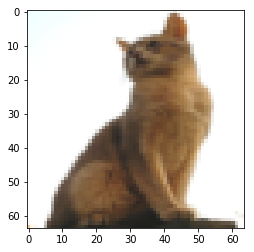

In [44]:
test_input_orig = test_set_x.reshape(50, 64, 64, 3)
index = 6
plt.imshow(test_input_orig[index])
print('Actual impage is: {}'.format(classes[np.squeeze(test_set_y[:,index])].decode("utf-8")))
print('Neural Network predicted impage is: {}'.format('cat' if y_pred_test_nn[index]==1 else 'not-cat'))
print('SVM predicted impage is: {}'.format('cat' if y_pred_test_svm[index]==1 else 'not-cat'))

# Add Logistic Regression too